<a href="https://colab.research.google.com/github/dakyommii/study/blob/main/test/dataLoadTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from PIL import Image
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
# from torchvision.transforms import ToTensor
import numpy as np
import torchvision
from torchvision import transforms

In [3]:
!unzip -qq "/content/drive/MyDrive/dataset/fork.zip"

In [13]:
trans = transforms.Compose([transforms.Resize((256,256)),
                            transforms.ToTensor(),
                            transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                            ])
trainset = torchvision.datasets.ImageFolder(root="/content/drive/MyDrive/fork",
                                            transform=trans)


In [14]:
trainset.__getitem__(18)

(tensor([[[-0.5137, -0.5137, -0.5137,  ..., -0.6784, -0.6627, -0.6627],
          [-0.6078, -0.6078, -0.6078,  ..., -0.8196, -0.8039, -0.7961],
          [-0.5922, -0.5922, -0.5922,  ..., -0.8196, -0.8118, -0.8039],
          ...,
          [-0.8196, -0.8118, -0.8039,  ..., -0.8196, -0.8196, -0.8196],
          [-0.8196, -0.8118, -0.8039,  ..., -0.8196, -0.8275, -0.8275],
          [-0.8196, -0.8118, -0.8039,  ..., -0.8196, -0.8275, -0.8275]],
 
         [[-0.4824, -0.4824, -0.4824,  ..., -0.6392, -0.6392, -0.6471],
          [-0.5843, -0.5843, -0.5843,  ..., -0.7882, -0.7804, -0.7804],
          [-0.5608, -0.5608, -0.5608,  ..., -0.7804, -0.7804, -0.7804],
          ...,
          [-0.6784, -0.6549, -0.6392,  ..., -0.8118, -0.8118, -0.8118],
          [-0.6784, -0.6549, -0.6392,  ..., -0.8118, -0.8196, -0.8196],
          [-0.6784, -0.6549, -0.6392,  ..., -0.8118, -0.8196, -0.8196]],
 
         [[-0.6392, -0.6392, -0.6392,  ..., -0.6863, -0.6863, -0.6863],
          [-0.7569, -0.7569,

In [15]:
len(trainset)

247

In [17]:
classes = trainset.classes
classes

['flower', 'landscape', 'tiger']

In [25]:
trainLoader = DataLoader(trainset,
                         batch_size = 16,
                         shuffle = False,
                         num_workers=4)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [26]:
dataiter = iter(trainLoader)
images, labels = dataiter.next()
print(labels)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [27]:
def imshow(img):
  img = img/2+0.5
  np_img = img.numpy()

  plt.imshow(np.transpose(np_img,(1,2,0)))

  print(np_img.shape)
  print((np.transpose(np_img,(1,2,0))).shape)

torch.Size([16, 3, 256, 256])
(3, 1034, 1034)
(1034, 1034, 3)
torch.Size([16, 3, 256, 256])
torch.Size([3, 518, 2066])
flower flower flower flower flower flower flower flower flower flower flower flower flower flower flower flower 


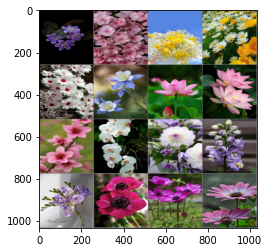

In [28]:
print(images.shape)
imshow(torchvision.utils.make_grid(images,nrow=4))
print(images.shape)
print((torchvision.utils.make_grid(images)).shape)
print("".join("%5s "%classes[labels[j]]for j in range(16)))